In [1]:
import numpy as np
import random
import itertools
import scipy.misc
import matplotlib.pyplot as plt
import pandas as pd


Text(0.5,0,'Utility of fixed alternative')

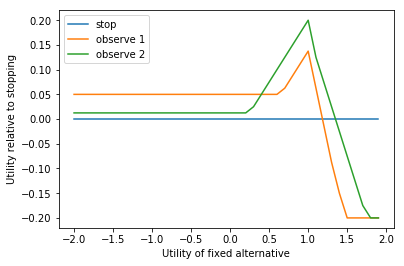

In [86]:
def comp_choice_vals(const):

    # possible values of U1 and U2
    U1_pos = np.array([-1.5,1.5])
    U2_pos = np.array([0.25,1.75])

    # different states corresopnd to differnet probability distributions over values of U1 and U2
    U1_states = np.array([[.5,.5], [1,0], [0,1]])
    U2_states = np.array([[.5,.5], [1,0], [0,1]])

    # probability of transitioning from row to column for U1 under observation 1, or U2 under observation 2
    obs_transition = np.array([[0, .5, .5], [0,1,0], [0,0,1]])
    cost = -.2

    # initialize state and action values
    
    # state 1 value x state 2 values
    state_vals = np.zeros([3,3])
    #choice (stop,obs1,obs2)xs1xs2 values
    choice_vals = np.zeros([3,3,3])

    error = 100000
    j = 0
    while error > .005:
        j = j+1
        old_state_vals = state_vals.copy()

        # single loop of value iteration
        for s1 in np.arange(3):
            for s2 in np.arange(3):
                u_choose1 = np.dot(U1_states[s1],U1_pos)
                u_choose2 = np.dot(U1_states[s2],U2_pos)
                u_stop = np.max([u_choose1, u_choose2, const])
                choice_vals[0,s1,s2] = u_stop

                # value of observing 1 in this state
                u_obs1 = cost + np.dot(obs_transition[s1],state_vals[:,s2])
                choice_vals[1,s1,s2] = u_obs1
                u_obs2 = cost + np.dot(obs_transition[s2],state_vals[s1,:])
                choice_vals[2,s1,s2] = u_obs2
                
                state_vals[s1,s2] = np.max(choice_vals[:,s1,s2])

        error = np.max(state_vals - old_state_vals)
        
    return choice_vals

const_vals = np.arange(-2,2,.1)
choice_val_store = np.zeros([3,len(const_vals)])
for i in np.arange(len(const_vals)):
    const = const_vals[i]
    choice_vals = comp_choice_vals(const)
    choice_val_store[1:,i] = choice_vals[1:,0,0] - choice_vals[0,0,0]
    
plt.plot(const_vals,choice_val_store[:,:].T)
plt.legend(('stop','observe 1', 'observe 2'))
plt.ylabel('Utility relative to stopping')
plt.xlabel('Utility of fixed alternative')

